In [13]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [14]:
data_train = pd.read_csv('data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocess

In [15]:
data_train = data_train.replace(['female','male'],[0,1])
data_train = data_train.replace(['S','C','Q'],[0,1,2])
data_train = data_train.fillna(10)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,10,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,10,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,10,0.0


In [27]:
X_train = np.array(data_train[['Pclass','Sex','Age','SibSp','Parch']])
Y_train = np.array(data_train[['Survived']])


## Model

In [41]:
model = tf.keras.models.Sequential([
    Dense(5,activation="sigmoid"),
    Dense(18,activation="relu"),
    Dense(3,activation="sigmoid"),
    Dense(2,activation="softmax")
])

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

## Train

In [43]:
train_output = model.fit(X_train,Y_train,epochs=150)

Epoch 1/150
28/28 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6296
Epoch 2/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7194
Epoch 3/150
28/28 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7811
Epoch 4/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.8013
Epoch 5/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.8025
Epoch 6/150
28/28 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.8002
Epoch 7/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 0.8002
Epoch 8/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.8171
Epoch 9/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.8238
Epoch 10/150
28/28 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7991
Epoch 11/

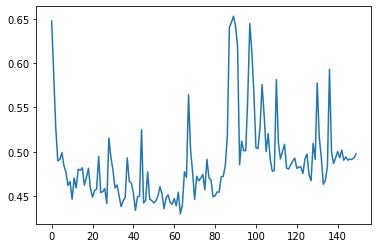

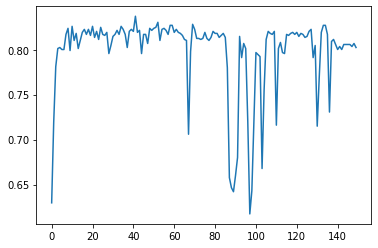

In [44]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

## Test

In [45]:
data_test_X = pd.read_csv('data/test.csv')
data_test_Y = pd.read_csv('data/gender_submission.csv')

data_test_X = data_test_X.replace(['female','male'],[0,1])
data_test_X = data_test_X.replace(['S','C','Q'],[0,1,2])
data_test_X = data_test_X.fillna(10)

X_test = np.array(data_test_X[['Pclass','Sex','Age','SibSp','Parch']])
Y_test = np.array(data_test_Y[['Survived']])

evaluate_test = model.evaluate(X_test,Y_test)
evaluate_test

14/14 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.9713


[0.25939077138900757, 0.9712918400764465]

In [46]:
Y_pred = model.predict(X_test)

Y_pred
Y_Pred = []
for i in range(Y_pred.shape[0]):
    y_pred = np.argmax(Y_pred[i])
    Y_Pred.append(y_pred)


In [47]:
acc_mlp = accuracy_score(Y_test,Y_Pred)
acc_mlp

0.9712918660287081

In [54]:
model.save('model/titanic.h5')

In [56]:
model = tf.keras.models.load_model('model/titanic.h5')

## KNN

In [48]:
neighbor = KNeighborsClassifier(5)
neighbor

neighbor.fit(X_train,Y_train)

c:\users\frsco\appdata\local\programs\python\python37\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [49]:
y_pred = neighbor.predict(X_test)

In [50]:
acc_knn = accuracy_score(Y_test,y_pred)
acc_knn

0.7655502392344498

## Perceptron

In [51]:
class Perceptron:
    def __init__(self,lr_w=0.001,lr_b=0.01,epochs=1):
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epoch = epochs
        self.w = np.random.rand(X_train.shape[1],1)
        self.b = np.random.rand(1,1)
        
    def fit(self,X_train,Y_train):
        Errors = []
        for epoch in range(self.epoch):
            for i in range(X_train.shape[0]):
                y_pred = np.matmul(X_train[i],self.w) + self.b
                e = Y_train[i] - y_pred  #khata yek dade
                self.w += (e * self.lr_w * X_train[i,:].T).T
                self.b = self.b + e * self.lr_b
                
    def predict(self,X):
        Y_pred = np.matmul(X,self.w) + self.b
        Y_pred = np.where(Y_pred < 1, 0, 1)
        return Y_pred

In [52]:
perceptron = Perceptron(lr_w=0.0001,lr_b=0.01,epochs=1)
perceptron.fit(X_train,Y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(Y_test,y_pred)
acc_perceptron

0.5598086124401914